In [ ]:
# importing liberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing Datasets
dataset = pd.read_csv('weatherAUS.csv')
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#Describe Method says the statistics of our data like Maxvalue,Mean,Count..etc for every column
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
#count all the null values in the data
dataset.isna().sum()
dataset['RainToday'] = dataset['RainToday'].replace({'No': 0, 'Yes': 1})
dataset['RainTomorrow'] = dataset['RainTomorrow'].replace({'No': 0, 'Yes': 1})

MinTemp            1485
MaxTemp            1261
Rainfall           3261
Evaporation       62790
Sunshine          69835
                  ...  
WindDir3pm_SSW        0
WindDir3pm_SW         0
WindDir3pm_W          0
WindDir3pm_WNW        0
WindDir3pm_WSW        0
Length: 3551, dtype: int64


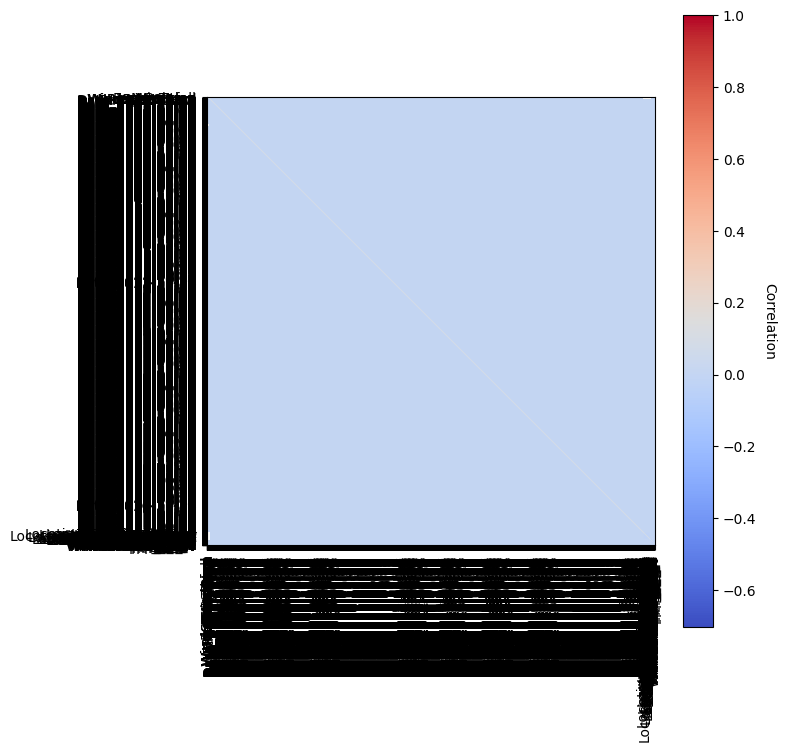

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'No' and 'Yes' with 0 and 1
dataset['RainToday'] = dataset['RainToday'].replace({'No': 0, 'Yes': 1})
dataset['RainTomorrow'] = dataset['RainTomorrow'].replace({'No': 0, 'Yes': 1})

# Get the columns with string values
string_cols = dataset.select_dtypes(include=['object']).columns

# One-hot encode the string columns
dataset = pd.get_dummies(dataset, columns=string_cols)

# Drop the specified columns


# Calculate missing values
missing_values = dataset.isnull().sum()
print(missing_values)

# Remove columns with many missing values
threshold = 0.5  # Adjust this value based on your requirements
dataset = dataset.loc[:, missing_values / len(dataset) < threshold]

# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 9))

# Generate the heatmap
im = ax.imshow(corr_matrix, cmap='coolwarm')

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom")

# Set ticks and labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Adjust spacing between labels
plt.subplots_adjust(bottom=0.2, left=0.2)

# Show the plot
plt.show()

**cleaning and preprocessing**

Feature Selection


In [ ]:
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,19,20,21]].values
Y = dataset.iloc[:,-1].values

In [ ]:
print(X)
print(Y)
Y = Y.reshape(-1,1)

[[22.9 0.6 nan ... False False False]
 [25.1 0.0 nan ... False False False]
 [25.7 0.0 nan ... False False False]
 ...
 [26.9 0.0 nan ... False False False]
 [27.0 0.0 nan ... False False False]
 [nan 0.0 nan ... False False False]]
[False  True  True ... False False False]


**Dealing with invalid Data**

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = Y.astype(int)
Y = imputer.fit_transform(Y)
print(X)
print(Y)

[[22.9 0.6 4.0 ... False False False]
 [25.1 0.0 4.0 ... False False False]
 [25.7 0.0 4.0 ... False False False]
 ...
 [26.9 0.0 4.0 ... False False False]
 [27.0 0.0 4.0 ... False False False]
 [20.0 0.0 4.0 ... False False False]]
[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


**Encoding Dataset**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])



print(X)
Y = np.array(Y,dtype=float)
print(Y)

[[262 0.6 4.0 ... False False 0]
 [284 0.0 4.0 ... False False 0]
 [290 0.0 4.0 ... False False 0]
 ...
 [302 0.0 4.0 ... False False 0]
 [303 0.0 4.0 ... False False 0]
 [233 0.0 4.0 ... False False 0]]
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)
print(Y)

[[-0.04136531 -0.20358073 -0.2572206  ... -0.00262198 -0.00262198
  -0.00262198]
 [ 0.26875145 -0.27509664 -0.2572206  ... -0.00262198 -0.00262198
  -0.00262198]
 [ 0.35332875 -0.27509664 -0.2572206  ... -0.00262198 -0.00262198
  -0.00262198]
 ...
 [ 0.52248334 -0.27509664 -0.2572206  ... -0.00262198 -0.00262198
  -0.00262198]
 [ 0.53657956 -0.27509664 -0.2572206  ... -0.00262198 -0.00262198
  -0.00262198]
 [-0.45015558 -0.27509664 -0.2572206  ... -0.00262198 -0.00262198
  -0.00262198]]
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


MODELLING
**Splitting Dataset into Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=None)
print(X_train)
print(Y_train)
Y_test.shape

[[-0.39377072 -0.251258   -0.93537646 ... -0.00262198 -0.00262198
  -0.00262198]
 [-0.91533072 -0.27509664 -0.38052166 ... -0.00262198 -0.00262198
  -0.00262198]
 [-0.19642369 -0.27509664 -0.2572206  ... -0.00262198 -0.00262198
  -0.00262198]
 ...
 [-0.30919342 -0.27509664 -0.2572206  ... -0.00262198 -0.00262198
  -0.00262198]
 [-1.22544748  0.15399879  0.35928474 ... -0.00262198 -0.00262198
  -0.00262198]
 [ 0.02911577  0.53541696 -0.2572206  ... -0.00262198 -0.00262198
  -0.00262198]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


(29092, 1)

MODELS

**Training Model**

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100,random_state=0)
classifier_rf.fit(X_train,Y_train)

<ipython-input-14-92250276c12a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train,Y_train)


RandomForestClassifier(random_state=0)

In [ ]:
classifier_rf.score(X_train,Y_train)

0.9999484394335213

In [ ]:
y_pred_rf = le6.inverse_transform(np.array(classifier_rf.predict(X_test),dtype=int))
Y_test_rf = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(y_pred_rf)
print("\n\n\n")
print(Y_test_rf)

[0 0 0 ... 0 0 0]




[0 0 0 ... 0 0 0]


In [ ]:
y_pred_rf = y_pred_rf.reshape(-1,1)
Y_test_rf = Y_test_rf.reshape(-1,1)
df = np.concatenate((Y_test_rf,y_pred_rf),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [ ]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                      0                  0
1                      0                  0
2                      0                  0
3                      0                  0
4                      1                  0
...                  ...                ...
29087                  0                  0
29088                  0                  0
29089                  0                  0
29090                  0                  0
29091                  0                  0

[29092 rows x 2 columns]


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
acc_rfs=accuracy_score(Y_test_rf,y_pred_rf)
acc_rfs

0.9343462120170494

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install scikit-learn==1.1.3
import sklearn
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(Y_test_rf, y_pred_rf)

# Print the confusion matrix
print(cm)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.2.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


[[27174     9]
 [ 1901     8]]


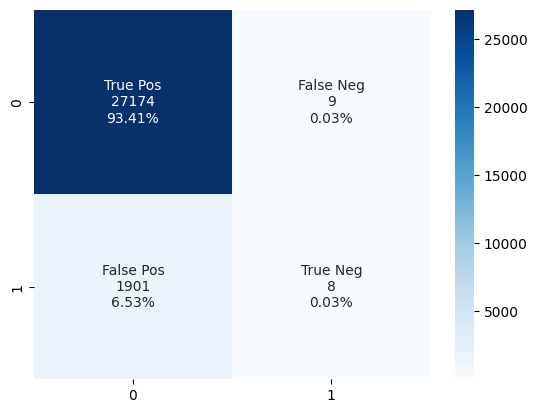

In [ ]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues');

In [ ]:
print(classification_report(Y_test_rf,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     27183
           1       0.47      0.00      0.01      1909

    accuracy                           0.93     29092
   macro avg       0.70      0.50      0.49     29092
weighted avg       0.90      0.93      0.90     29092



**Logisitic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if len(shape) == 1:


LogisticRegression(random_state=0)

In [ ]:
classifier_lr.score(X_train,Y_train)

0.9340540354736697

In [ ]:
y_pred_lr = le6.inverse_transform(np.array(classifier_lr.predict(X_test),dtype=int))
Y_test_lr = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(y_pred_lr)
print(Y_test_lr)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:

y_pred_lr = y_pred_lr.reshape(-1,1)
Y_test_lr = Y_test_lr.reshape(-1,1)
df = np.concatenate((Y_test_lr,y_pred_lr),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                      0                  0
1                      0                  0
2                      0                  0
3                      0                  0
4                      1                  0
...                  ...                ...
29087                  0                  0
29088                  0                  0
29089                  0                  0
29090                  0                  0
29091                  0                  0

[29092 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(Y_test_lr,y_pred_lr)
acc_lr

0.9336931115083185

In [ ]:

cm_lr=confusion_matrix(Y_test_lr,y_pred_lr)
print(cm_lr)

[[27159    24]
 [ 1905     4]]


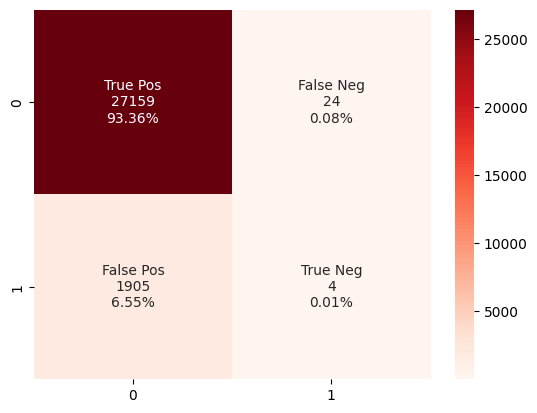

In [ ]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lr.flatten()/np.sum(cm_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Reds');

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_lr,y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     27183
           1       0.14      0.00      0.00      1909

    accuracy                           0.93     29092
   macro avg       0.54      0.50      0.48     29092
weighted avg       0.88      0.93      0.90     29092



**DecisionTree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
classifier_dt.score(X_train,Y_train)
y_pred_dt = le6.inverse_transform(np.array(classifier_dt.predict(X_test),dtype=int))
Y_test_dt = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
classifier_dt.score(X_train,Y_train)

1.0

In [ ]:
print(y_pred_dt)
print(Y_test_dt)
y_pred_dt = y_pred_dt.reshape(-1,1)
Y_test_dt = Y_test_dt.reshape(-1,1)
df = np.concatenate((Y_test_dt,y_pred_dt),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])
print(dataframe)

[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 0]
       Rain on Tommorrow  Predition of Rain
0                      0                  0
1                      0                  0
2                      0                  0
3                      0                  0
4                      1                  0
...                  ...                ...
29087                  0                  0
29088                  0                  0
29089                  0                  0
29090                  0                  0
29091                  0                  1

[29092 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(Y_test_dt,y_pred_dt)
acc_dt

0.8770108620926715

In [ ]:

cm_dt=confusion_matrix(Y_test_dt,y_pred_dt)
print(cm_dt)

[[25233  1950]
 [ 1628   281]]


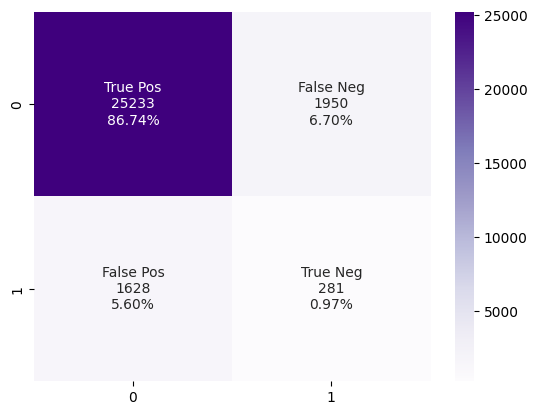

In [ ]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt, annot=labels, fmt="", cmap='Purples');

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_dt,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     27183
           1       0.13      0.15      0.14      1909

    accuracy                           0.88     29092
   macro avg       0.53      0.54      0.53     29092
weighted avg       0.89      0.88      0.88     29092



**Light Gbm**

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier(random_state =0)
classifier_lgbm.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 7609, number of negative: 108759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2196
[LightGBM] [Info] Number of data points in the train set: 116368, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.065387 -> initscore=-2.659803
[LightGBM] [Info] Start training from score -2.659803


LGBMClassifier(random_state=0)

In [ ]:
classifier_lgbm.score(X_train,Y_train)

0.9351282139419772

In [ ]:
y_pred_lgbm = le6.inverse_transform(np.array(classifier_lgbm.predict(X_test),dtype=int))
Y_test_lgbm = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(y_pred_lgbm)
print(Y_test_lgbm)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
y_pred_lgbm = y_pred_lgbm.reshape(-1,1)
Y_test_lgbm = Y_test_lgbm.reshape(-1,1)
df = np.concatenate((Y_test_lgbm,y_pred_lgbm),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                      0                  0
1                      0                  0
2                      0                  0
3                      0                  0
4                      1                  0
...                  ...                ...
29087                  0                  0
29088                  0                  0
29089                  0                  0
29090                  0                  0
29091                  0                  0

[29092 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
acc_lg=accuracy_score(Y_test_lgbm,y_pred_lgbm)
acc_lg

0.9343462120170494

In [ ]:

cm_lg=confusion_matrix(Y_test_lgbm,y_pred_lgbm)
print(cm_lg)

[[27180     3]
 [ 1907     2]]


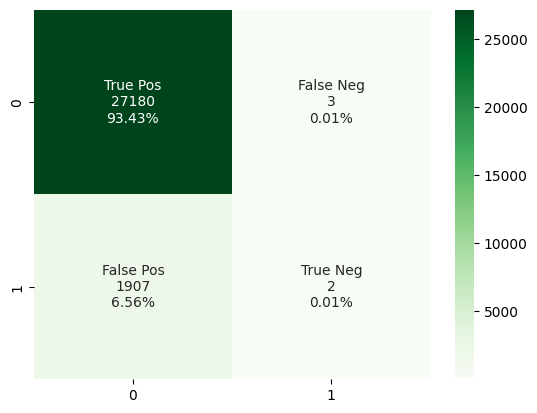

In [ ]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lg.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lg.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lg, annot=labels, fmt="", cmap='Greens');

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_lgbm,y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     27183
           1       0.40      0.00      0.00      1909

    accuracy                           0.93     29092
   macro avg       0.67      0.50      0.48     29092
weighted avg       0.90      0.93      0.90     29092



** xgboost**

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
clf_xgb = XGBRegressor(random_state=0)
clf_xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [ ]:
clf_xgb.score(X_train,Y_train)

0.2133036043141754

In [ ]:
y_pred_xgb = le6.inverse_transform(np.array(clf_xgb.predict(X_test),dtype=int))
Y_test_xgb = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(y_pred_xgb)
print(Y_test_xgb)
y_pred_xgb = y_pred_xgb.reshape(-1,1)
Y_test_xgb = Y_test_xgb.reshape(-1,1)
df = np.concatenate((Y_test_xgb,y_pred_xgb),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])
print(dataframe)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
       Rain on Tommorrow  Predition of Rain
0                      0                  0
1                      0                  0
2                      0                  0
3                      0                  0
4                      1                  0
...                  ...                ...
29087                  0                  0
29088                  0                  0
29089                  0                  0
29090                  0                  0
29091                  0                  0

[29092 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score
acc_xgb=accuracy_score(Y_test_xgb,y_pred_xgb)
acc_xgb

0.9343462120170494

In [ ]:

cm_xgb=confusion_matrix(Y_test_xgb,y_pred_xgb)
print(cm_xgb)

[[27182     1]
 [ 1909     0]]


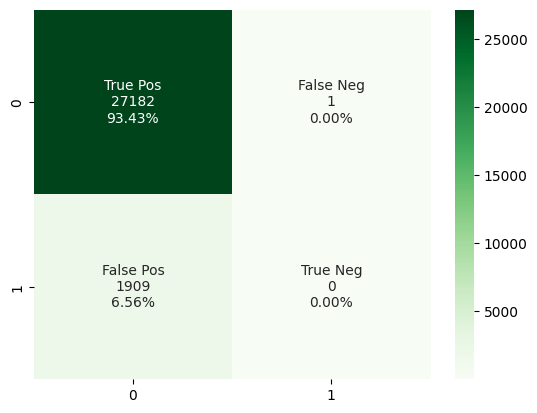

In [ ]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_xgb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_xgb.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lg, annot=labels, fmt="", cmap='Greens');

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_xgb,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     27183
           1       0.00      0.00      0.00      1909

    accuracy                           0.93     29092
   macro avg       0.47      0.50      0.48     29092
weighted avg       0.87      0.93      0.90     29092



**Accuracy Comparison**

In [ ]:
accuracy_dict = {"Logistic Regression": acc_lr,
                 "Random Forest": acc_rfs,
                 "Decision Trees": acc_dt,
                 "LightGBM": acc_lg,
                 "Xgboost": acc_xgb}

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.933693
Random Forest,0.934346
Decision Trees,0.877011
LightGBM,0.934346
Xgboost,0.934346


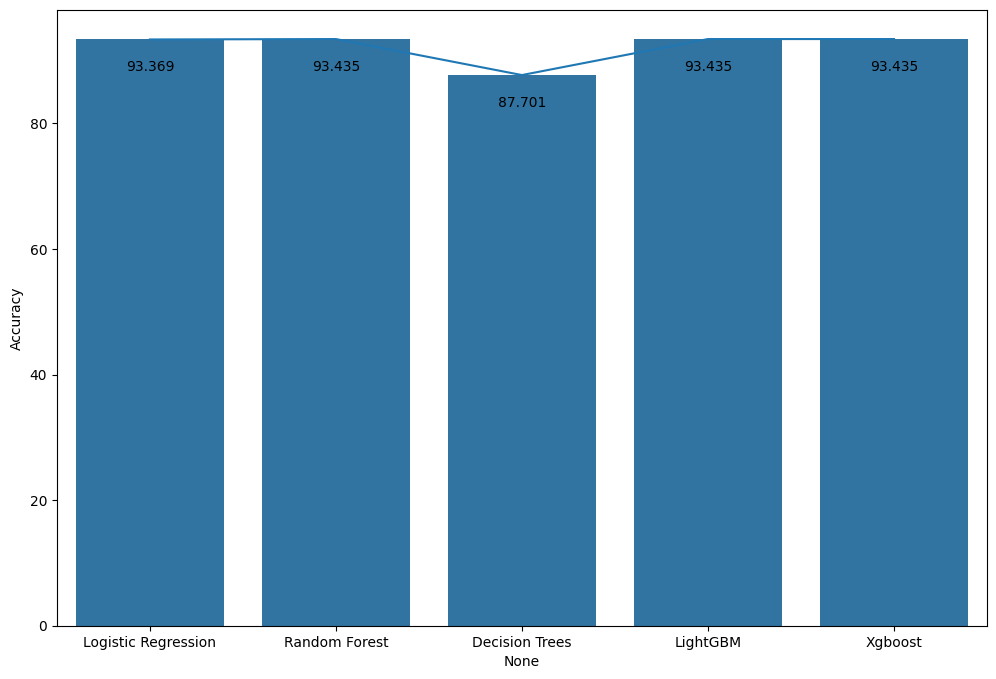

In [ ]:
fig = plt.gcf();
fig.set_size_inches(12, 8);

sns.lineplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);
sns.barplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);

for i, val in enumerate(accuracy_df.index):
    y = round(accuracy_df.loc[val].sum()*100, 3)
    plt.text(i, y-5, str(y), ha = "center")

In [ ]:
import pickle
filename = 'trained_model.sav'
pickle.dump(classifier_rf,open(filename,'wb'))
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
!pip install streamlit
import numpy as np
import pickle
import streamlit as st
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install streamlit --quiet
!pip install pyngrok

In [ ]:
!pip install ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:00


In [ ]:

import streamlit as st

loaded_model=pickle.load(open('/content/trained_model.sav','rb'))

#creating a function for prediction

def rainfall_predict(input_data):
    input_data=np.asarray(input_data)
    input_data=input_data.reshape(1,-1)
    #sc1 = StandardScaler()
    #input_data = sc1.fit_transform(input_data)

    y_pred = (np.array(loaded_model.predict(input_data),dtype=int))
    if(y_pred[0]==0):
        return 'Tomorrow there will be rainfall'
    else:
        return 'Tomorrow there is no rainfall'




def main():

    #Giving a title
    print('Rainfall Prediction Web App')

    area=['Albury', 'BadgerysCreek' ,'Cobar', 'CoffsHarbour', 'Moree' ,'Newcastle',
 'NorahHead' ,'NorfolkIsland' ,'Penrith' ,'Richmond' ,'Sydney', 'SydneyAirport',
 'WaggaWagga' ,'Williamtown' ,'Wollongong', 'Canberra' ,'Tuggeranong',
 'MountGinini', 'Ballarat', 'Bendigo', 'Sale' ,'MelbourneAirport' ,'Melbourne',
 'Mildura' ,'Nhil' ,'Portland', 'Watsonia', 'Dartmoor' ,'Brisbane' ,'Cairns',
 'GoldCoast' ,'Townsville' ,'Adelaide', 'MountGambier', 'Nuriootpa' ,'Woomera',
 'Albany', 'Witchcliffe' ,'PearceRAAF' ,'PerthAirport' ,'Perth' ,'SalmonGums',
 'Walpole' ,'Hobart' ,'Launceston' ,'AliceSprings' ,'Darwin' ,'Katherine',
 'Uluru']

    direction=['nan','W', 'WNW' ,'WSW', 'NE' ,'NNW', 'N' ,'NNE', 'SW','ENE' ,'SSE', 'S',
               'NW' ,'SE','ESE', 'E' ,'SSW']
   # #Location=st.selectbox('Select a location',options=area)
    #MinTemp=input('Enter minimum temperature of the day in celcius')
    #MaxTemp=input('Enter maximum temperature of the day in celcius')
    #Rainfall=input('Enter rainfall in cms')
    #WindGustDir=st.selectbox('Select wind gust direction ',options=direction)
    #WindGustSpeed=input('Enter the gust speed in meter/sec')
    #WindDir9am=st.selectbox('Select wind direction at 9am',options=direction)
    #WindDir3pm=st.selectbox('Select wind direction at 3pm',options=direction)
    #WindSpeed9am=input('Enter wind speed at 9am in m/sec')
    #WindSpeed3pm=input('Enter wind speed at 3pm in m/sec')
    #Humidity9am=input('Enter humidity at 9am in gm/kg')
    #Humidity3pm=input('Enter humidity at 3pm in gm/kg')
    #Pressure9am=input('Enter pressure at 9am in atm')
    #Pressure3pm=input('Enter pressure at 3pm in atm')
    #Temp9am=input('Enter the temperature at 9am in celcius')
    #Temp3pm=input('Enter the temperature at 3pm in celcuis')
    #RainToday=st.text_input('Enter rain today,if yes 1 else 0')"""

    #code for prediction

    diagonsis=''
    diagonsis=rainfall_predict(['Albury',13.4,22.9,0.6,'W',44,'W','WNW',20,24,71,22,1007.7,1007.1,16.9,21.8,0])

    print()
    print(diagonsis)

if __name__ =='__main__':
    main()


Rainfall Prediction Web App

Tomorrow there will be rainfall


In [ ]:
import streamlit as st
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

loaded_model = pickle.load(open('/content/trained_model.sav', 'rb'))

# Creating a function for prediction
def rainfall_predict(input_data):
    input_data_encoded = []
    categorical_indices = [0, 4, 6, 7]  # Indices of categorical features
    label_encoders = [LabelEncoder() for _ in categorical_indices]

    # Perform label encoding for categorical features
    for i, value in enumerate(input_data):
        if i in categorical_indices:
          label_encoders[categorical_indices.index(i)].fit(['nan'] + [value])
          input_data_encoded.append(label_encoders[categorical_indices.index(i)].transform([value])[0])
        else:
            input_data_encoded.append(value)

    input_data_encoded = np.asarray(input_data_encoded)
    input_data_encoded = input_data_encoded.reshape(1, -1)

    y_pred = np.array(loaded_model.predict(input_data_encoded), dtype=int)
    if y_pred[0] == 1:
        return 'Tomorrow there will be rainfall'
    else:
        return 'Tomorrow there is no rainfall'


def main():
    # Giving a title
    print('Rainfall Prediction Web App')

    area = ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle',
            'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport',
            'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong',
            'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne',
            'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
            'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera',
            'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums',
            'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine',
            'Uluru']

    direction = ['nan', 'W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE', 'S',
                 'NW', 'SE', 'ESE', 'E', 'SSW']

    # code for prediction
    diagonsis = rainfall_predict(['CoffsHarbour', 9.7, 31.9, 0, 'NNW', 80, 'SE', 'NW', 7, 28, 42, 9, 1008.9, 1003.6, 18.3,
                                  30.2, 1])

    print()
    print(diagonsis)


if __name__ == '__main__':
    main()


Rainfall Prediction Web App

Tomorrow there is no rainfall
